In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

kernel = np.ones((7, 7), np.uint8)

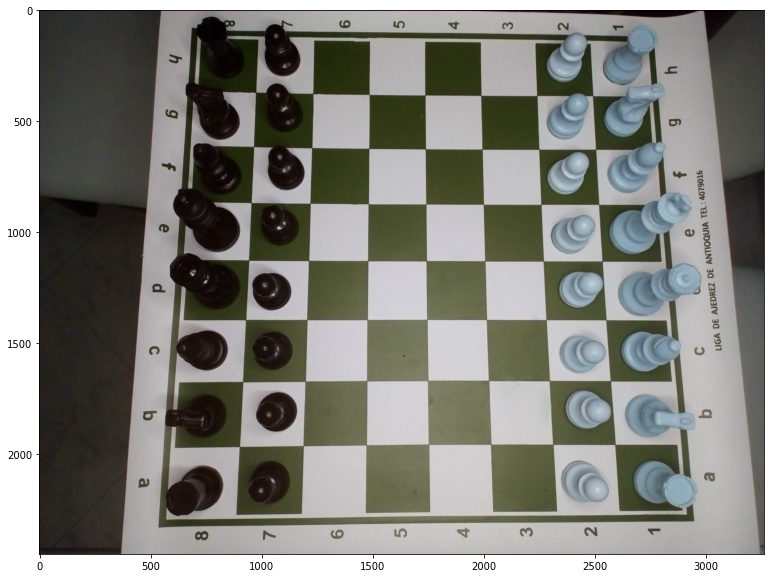

In [2]:
im1=cv2.imread("./subs/d10.jpg")
plt.figure(figsize = (16,10))
plt.imshow(im1)

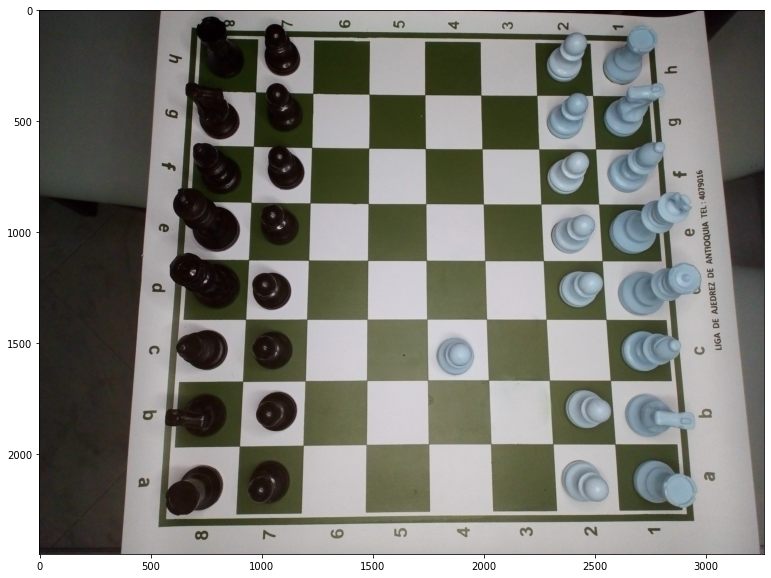

In [3]:
im2=cv2.imread("./subs/d11.jpg")
plt.figure(figsize = (16,10))
plt.imshow(im2)

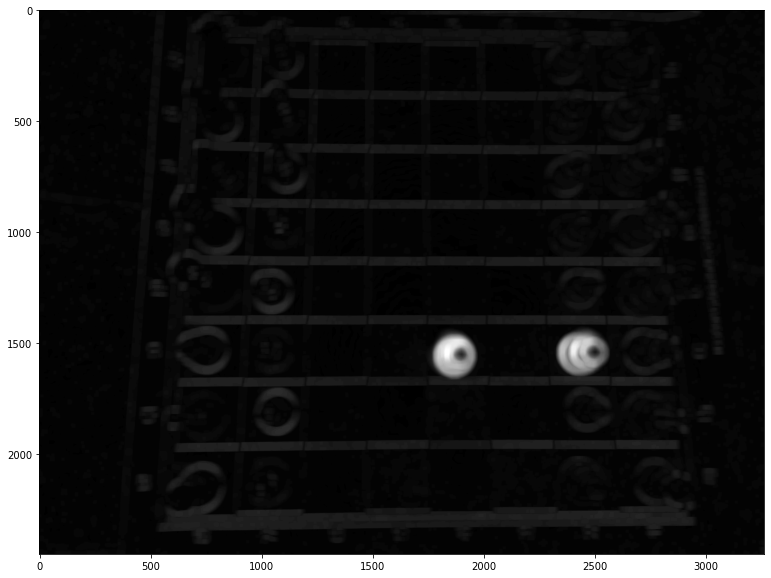

In [4]:
prev_frame=cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
frame=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)
prev_blur = cv2.blur(prev_frame, (29, 29), 1)
blur = cv2.blur(frame, (29, 29), 1)

diff = cv2.absdiff(prev_blur, blur)
diff = cv2.dilate(diff, kernel, iterations = 2)
plt.figure(figsize = (16,10))
plt.imshow(diff, cmap = 'gray')

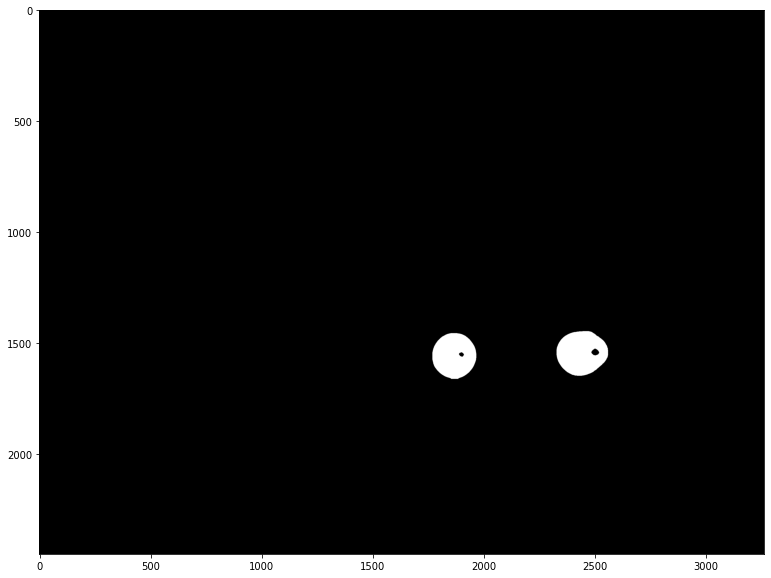

In [5]:
h, thresh = cv2.threshold(diff, 15, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (16,10))
plt.imshow(thresh, cmap='gray')

In [6]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

"""
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour) # Obtiene las coordenadas del contorno

    #Discrimina el dibujo de rectangulos cuando el movimiento es muy pequeño
    if cv2.contourArea(contour) < 10:
        continue
    cv2.rectangle(im2, (x, y), (x+w, y+h), (255, 0, 0), 2) # Dibuja el rectangulo
    
plt.imshow(im2)
"""

len(contours)

2

In [7]:
list_contours = list(contours)

In [8]:
cnt1 = max(list_contours, key=lambda x: cv2.contourArea(x))
list_contours.remove(cnt1)

cnt2 = max(list_contours, key=lambda x: cv2.contourArea(x))

/tmp/ipykernel_19587/4243989664.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  list_contours.remove(cnt1)


In [9]:
M1 = cv2.moments(cnt1)
M2 = cv2.moments(cnt2)

x1 = int(M1["m10"]/M1["m00"])
y1 = int(M1["m01"]/M1["m00"])
c1 = (x1, y1)


x2 = int(M2["m10"]/M2["m00"])
y2 = int(M2["m01"]/M2["m00"])
c2 = (x2, y2)

In [10]:
print (f'c1: {c1} \t c2: {c2}')

c1: (2442, 1542) 	 c2: (1868, 1555)
